In [1]:
%matplotlib inline
import autograd.numpy as np
from autograd.numpy.linalg import inv, det
from scipy.special import logsumexp
from autograd import grad
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, wishart
from scipy.special import digamma
from numpy import matmul
from util_gmm_nw import *
from spiral import *

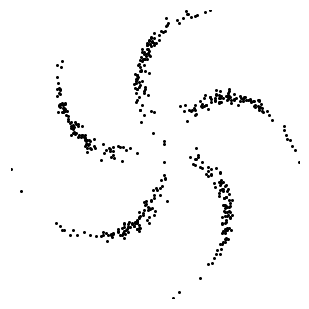

In [2]:
# filename = 'iris.data'
# Y, N, D = load_iris(filename)
num_clusters = 5           # number of clusters in pinwheel data
samples_per_cluster = 100  # number of samples per cluster in pinwheel
K = 10                   # number of components in mixture model
Y = make_pinwheel_data(0.3, 0.05, num_clusters, samples_per_cluster, 0.25)
plot_data(Y)

## Hyperparameteres

In [3]:
D = 2
N = num_clusters * samples_per_cluster
# K = 3

In [4]:
# true_mus, true_covs, true_Z = empirical_cluster(Y, N, D, K)
# plot_clusters(Y, true_mus, true_covs, true_Z)

In [38]:
## prior
alpha_0 = np.ones(K)
m_0 = Y.mean(0)
beta_0 = 1.0
nu_0 = 6.0
W_0 = inv((nu_0-D-1) * np.dot((Y - m_0).T, (Y - m_0)) / N) / 0.1
cov = np.cov(Y.T)

## VBEM

In [39]:
alpha_hat = alpha_0
# m_ks = np.tile(m_0, (K, 1))
m_ks = multivariate_normal.rvs(size=K, mean=m_0, cov=cov)
m_ks_save = m_ks.copy()
beta_ks = np.tile(beta_0, K)
nu_ks = np.tile(nu_0, K)
W_ks = np.tile(W_0, (K, 1, 1))
cov_ks = np.tile(cov,(K,1,1)) 
cov_ks_save = cov_ks.copy()

In [40]:
iterations = 100

In [41]:
epoch_elbos = []
for i in range(iterations):
    ## VBE step
    log_gammas = vbE_step(alpha_hat, nu_ks, W_ks, m_ks, beta_ks, Y, N, D, K)
#     gammas, log_gammas = variational_E_step(alpha_hat, m_ks, W_ks, beta_ks, nu_ks, Y, N, D, K)
    N_ks, Y_ks, S_ks = stats(log_gammas, Y, D, K)
    ## VBM step
    alpha_hat, nu_ks, W_ks, m_ks, beta_ks, cov_ks = vbM_step(log_gammas, alpha_0, nu_0, W_0, m_0, beta_0, N_ks, Y_ks, S_ks, N, D, K)
#     ## elbo
#     epoch_elbo = elbo(log_gammas, alpha_0, nu_0, W_0, m_0, beta_0, N_ks, Y_ks, S_ks, alpha_hat, nu_ks, W_ks, m_ks, beta_ks, N, D, K)
#     epoch_elbos.append(epoch_elbo)
#     print('Iteration:%d, ELBO:%f' % ((i+1), epoch_elbo))
final_covs = cov_ks ## mean of inverse wishart
final_mus = m_ks ## mean of gaussian

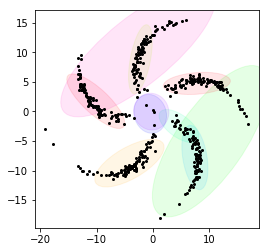

In [42]:
plot_clusters(Y, final_mus, cov_ks, K)
# plot_clusters(Y, final_mus, final_covs, true_Z)

In [10]:
# plt.savefig('gmm_nw.png')